In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.applications import VGG16, NASNetLarge, Xception, InceptionResNetV2, DenseNet169

%matplotlib inline

Using TensorFlow backend.


## Define generators

In [2]:
# Data directory
train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"
test_dir = "./dataset2/test"

# All images will be rescaled by 1./255
# ++Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest',brightness_range=[0.5,1.5])

val_test_datagen = ImageDataGenerator(rescale=1./255)

#batchsize = 16
#lr = 2e-5
batchSize = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=batchSize,
        class_mode='binary')

validation_generator = val_test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batchSize,
        class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=batchSize,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


# Design Model

### Model 1 : 3-Conv

In [3]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
__________

## Model 2 : VGG16

In [4]:
vgg_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
vgg_base.trainable = False

model2 = models.Sequential()
model2.add(vgg_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


### Model 3 : NASNetLarge

In [9]:
nasNet_base = NASNetLarge(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
nasNet_base.trainable = False

model3 = models.Sequential()
model3.add(nasNet_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 5, 5, 4032)        84916818  
_________________________________________________________________
flatten_7 (Flatten)          (None, 100800)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               25805056  
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 110,722,131
Trainable params: 25,805,313
Non-trainable params: 84,916,818
_________________________________________________________________


### Model 4 : Xception

In [10]:
xCeption_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
xCeption_base.trainable = False

model4 = models.Sequential()
model4.add(xCeption_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_8 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               13107456  
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 33,969,193
Trainable params: 13,107,713
Non-trainable params: 20,861,480
_________________________________________________________________


### Model 5 : InceptionResNetV2

In [11]:
inceptionRN2_base = InceptionResNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
inceptionRN2_base.trainable = False

model5 = models.Sequential()
model5.add(inceptionRN2_base)
model5.add(layers.Flatten())
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_9 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               3539200   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 57,876,193
Trainable params: 3,539,457
Non-trainable params: 54,336,736
_________________________________________________________________


### Model 6 : DenseNet169

In [12]:
denseNet_base = DenseNet169(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
denseNet_base.trainable = False

model6 = models.Sequential()
model6.add(denseNet_base)
model6.add(layers.Flatten())
model6.add(layers.Dense(256, activation='relu'))
model6.add(layers.Dense(1, activation='sigmoid'))

model6.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 4, 4, 1664)        12642880  
_________________________________________________________________
flatten_10 (Flatten)         (None, 26624)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               6816000   
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 19,459,137
Trainable params: 6,816,257
Non-trainable params: 12,642,880
_________________________________________________________________


# Traning Model

In [5]:
# Create callback list for model fitting
weight_path_model1="weights_model1.best.hdf5"
weight_path_model2="weights_model2.best.hdf5"
weight_path_model3="weights_model3.best.hdf5"
weight_path_model4="weights_model4.best.hdf5"
weight_path_model5="weights_model5.best.hdf5"
weight_path_model6="weights_model6.best.hdf5"

checkpoint1 = ModelCheckpoint(weight_path_model1, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint2 = ModelCheckpoint(weight_path_model2, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint3 = ModelCheckpoint(weight_path_model3, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint4 = ModelCheckpoint(weight_path_model4, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint5 = ModelCheckpoint(weight_path_model5, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint6 = ModelCheckpoint(weight_path_model6, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat1 = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
reduceLROnPlat2 = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
reduceLROnPlat3 = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
reduceLROnPlat4 = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
reduceLROnPlat5 = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
reduceLROnPlat6 = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)

early1 = EarlyStopping(monitor="val_loss", mode="min", patience=6)
early2 = EarlyStopping(monitor="val_loss", mode="min", patience=6)
early3 = EarlyStopping(monitor="val_loss", mode="min", patience=6)
early4 = EarlyStopping(monitor="val_loss", mode="min", patience=6)
early5 = EarlyStopping(monitor="val_loss", mode="min", patience=6)
early6 = EarlyStopping(monitor="val_loss", mode="min", patience=6)

callbacks_list1 = [checkpoint1]
callbacks_list2 = [checkpoint2]
callbacks_list3 = [checkpoint3]
callbacks_list4 = [checkpoint4]
callbacks_list5 = [checkpoint5]
callbacks_list6 = [checkpoint6]

C:\Users\Pasin\Anaconda3\envs\py36\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


## Train Model 1 with batchsize=32 and lr=2e-5

In [8]:
#(65x16 = 1040 images per epoch)
history1 = model1.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list1,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
64/64 [==============================] - 300s 5s/step - loss: 0.5909 - acc: 0.7109 - val_loss: 0.5522 - val_acc: 0.7109

Epoch 00001: val_loss improved from inf to 0.55217, saving model to weights_model1.best.hdf5
Epoch 2/50
64/64 [==============================] - 205s 3s/step - loss: 0.5673 - acc: 0.7116 - val_loss: 0.5478 - val_acc: 0.7080

Epoch 00002: val_loss improved from 0.55217 to 0.54781, saving model to weights_model1.best.hdf5
Epoch 3/50
64/64 [==============================] - 182s 3s/step - loss: 0.5579 - acc: 0.7207 - val_loss: 0.5321 - val_acc: 0.7140

Epoch 00003: val_loss improved from 0.54781 to 0.53213, saving model to weights_model1.best.hdf5
Epoch 4/50
64/64 [==============================] - 165s 3s/step - loss: 0.5622 - acc: 0.7079 - val_loss: 0.5296 - val_acc: 0.7160

Epoch 00004: val_loss improved from 0.53213 to 0.52964, saving model to weights_model1.best.hdf5
Epoch 5/50
64/64 [==============================] - 159s 2s/step - loss: 0.5468 - acc: 0

64/64 [==============================] - 152s 2s/step - loss: 0.5073 - acc: 0.7424 - val_loss: 0.4869 - val_acc: 0.7680

Epoch 00042: val_loss did not improve from 0.45785
Epoch 43/50
64/64 [==============================] - 164s 3s/step - loss: 0.5008 - acc: 0.7524 - val_loss: 0.4685 - val_acc: 0.7680

Epoch 00043: val_loss did not improve from 0.45785
Epoch 44/50
64/64 [==============================] - 150s 2s/step - loss: 0.5072 - acc: 0.7463 - val_loss: 0.4750 - val_acc: 0.7740

Epoch 00044: val_loss did not improve from 0.45785
Epoch 45/50
64/64 [==============================] - 142s 2s/step - loss: 0.5165 - acc: 0.7316 - val_loss: 0.4871 - val_acc: 0.7580

Epoch 00045: val_loss did not improve from 0.45785
Epoch 46/50
64/64 [==============================] - 146s 2s/step - loss: 0.4886 - acc: 0.7494 - val_loss: 0.5121 - val_acc: 0.7440

Epoch 00046: val_loss did not improve from 0.45785
Epoch 47/50
64/64 [==============================] - 150s 2s/step - loss: 0.4853 - acc: 0.76

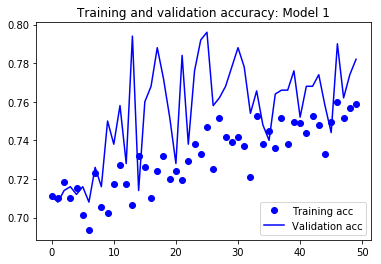

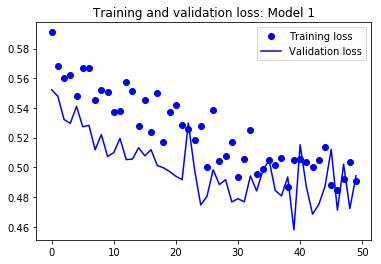

In [20]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 1')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 1')
plt.legend()

plt.show()

## Train Model 2 with batchsize=32 and lr=2e-5

In [16]:
#(65x16 = 1040 images per epoch)
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list2,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
64/64 [==============================] - 313s 5s/step - loss: 0.5969 - acc: 0.7061 - val_loss: 0.5944 - val_acc: 0.7129

Epoch 00001: val_loss improved from inf to 0.59436, saving model to weights_model2.best.hdf5
Epoch 2/50
64/64 [==============================] - 221s 3s/step - loss: 0.5761 - acc: 0.7130 - val_loss: 0.5832 - val_acc: 0.7120

Epoch 00002: val_loss improved from 0.59436 to 0.58325, saving model to weights_model2.best.hdf5
Epoch 3/50
64/64 [==============================] - 204s 3s/step - loss: 0.5551 - acc: 0.7231 - val_loss: 0.5461 - val_acc: 0.7080

Epoch 00003: val_loss improved from 0.58325 to 0.54614, saving model to weights_model2.best.hdf5
Epoch 4/50
64/64 [==============================] - 263s 4s/step - loss: 0.5556 - acc: 0.7252 - val_loss: 0.5695 - val_acc: 0.7080

Epoch 00004: val_loss did not improve from 0.54614
Epoch 5/50
64/64 [==============================] - 229s 4s/step - loss: 0.5610 - acc: 0.7106 - val_loss: 0.5184 - val_acc: 0.7260

Ep

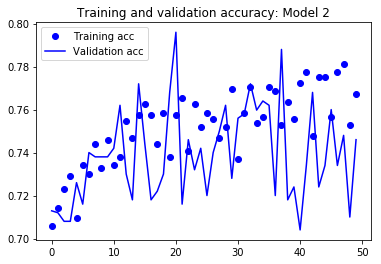

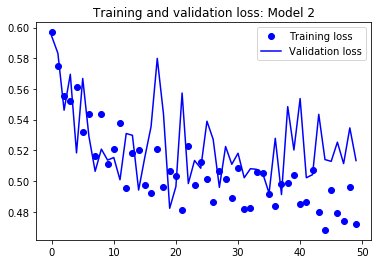

In [17]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 2')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 2')
plt.legend()

plt.show()

## Train Model 3 with batchsize=32 and lr=2e-5

In [18]:
#(65x16 = 1040 images per epoch)
history3 = model3.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list3,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
64/64 [==============================] - 177s 3s/step - loss: 0.6607 - acc: 0.7121 - val_loss: 0.6285 - val_acc: 0.6620

Epoch 00001: val_loss improved from inf to 0.62855, saving model to weights_model3.best.hdf5
Epoch 2/50
64/64 [==============================] - 186s 3s/step - loss: 0.6011 - acc: 0.7224 - val_loss: 0.6606 - val_acc: 0.7420

Epoch 00002: val_loss did not improve from 0.62855
Epoch 3/50
64/64 [==============================] - 173s 3s/step - loss: 0.5855 - acc: 0.7370 - val_loss: 0.8397 - val_acc: 0.6980

Epoch 00003: val_loss did not improve from 0.62855
Epoch 4/50
64/64 [==============================] - 150s 2s/step - loss: 0.5627 - acc: 0.7536 - val_loss: 0.9409 - val_acc: 0.7020

Epoch 00004: val_loss did not improve from 0.62855
Epoch 5/50
64/64 [==============================] - 148s 2s/step - loss: 0.5488 - acc: 0.7550 - val_loss: 0.8014 - val_acc: 0.7180

Epoch 00005: val_loss did not improve from 0.62855
Epoch 6/50
64/64 [=========================

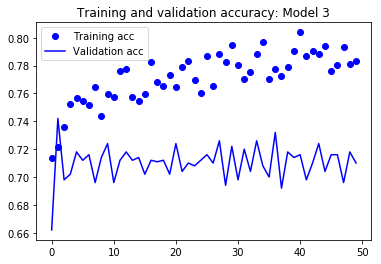

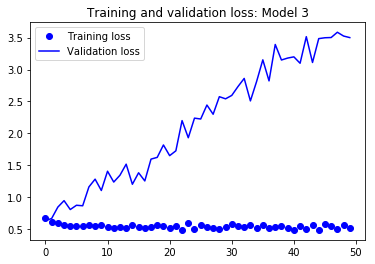

In [19]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 3')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 3')
plt.legend()

plt.show()

## Train Model 4 with batchsize=32 and lr=2e-5

In [20]:
#(65x16 = 1040 images per epoch)
history4 = model4.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list4,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
64/64 [==============================] - 192s 3s/step - loss: 0.6102 - acc: 0.7153 - val_loss: 1.1151 - val_acc: 0.7180

Epoch 00001: val_loss improved from inf to 1.11513, saving model to weights_model4.best.hdf5
Epoch 2/50
64/64 [==============================] - 176s 3s/step - loss: 0.5807 - acc: 0.7255 - val_loss: 0.8223 - val_acc: 0.7129

Epoch 00002: val_loss improved from 1.11513 to 0.82229, saving model to weights_model4.best.hdf5
Epoch 3/50
64/64 [==============================] - 172s 3s/step - loss: 0.5283 - acc: 0.7455 - val_loss: 1.2423 - val_acc: 0.7160

Epoch 00003: val_loss did not improve from 0.82229
Epoch 4/50
64/64 [==============================] - 160s 2s/step - loss: 0.5568 - acc: 0.7267 - val_loss: 1.4185 - val_acc: 0.7080

Epoch 00004: val_loss did not improve from 0.82229
Epoch 5/50
64/64 [==============================] - 158s 2s/step - loss: 0.5406 - acc: 0.7465 - val_loss: 1.2655 - val_acc: 0.7280

Epoch 00005: val_loss did not improve from 0.822

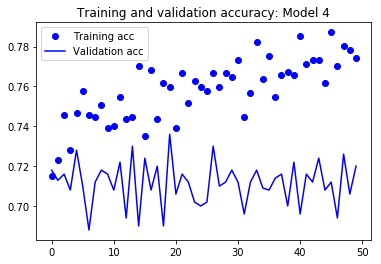

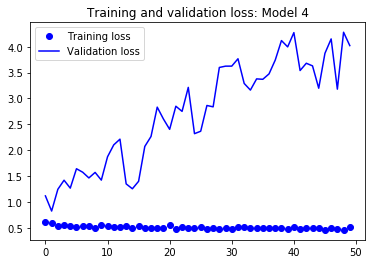

In [21]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 4')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 4')
plt.legend()

plt.show()

## Train Model 5 with batchsize=32 and lr=2e-5

In [9]:
#(65x16 = 1040 images per epoch)
history5 = model5.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list5,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
64/64 [==============================] - 169s 3s/step - loss: 0.6708 - acc: 0.6723 - val_loss: 1.1917 - val_acc: 0.7180

Epoch 00001: val_loss improved from inf to 1.19169, saving model to weights_model5.best.hdf5
Epoch 2/50
64/64 [==============================] - 142s 2s/step - loss: 0.5795 - acc: 0.7062 - val_loss: 1.1271 - val_acc: 0.7020

Epoch 00002: val_loss improved from 1.19169 to 1.12707, saving model to weights_model5.best.hdf5
Epoch 3/50
64/64 [==============================] - 141s 2s/step - loss: 0.5731 - acc: 0.7104 - val_loss: 0.7585 - val_acc: 0.7240

Epoch 00003: val_loss improved from 1.12707 to 0.75849, saving model to weights_model5.best.hdf5
Epoch 4/50
64/64 [==============================] - 143s 2s/step - loss: 0.5487 - acc: 0.7224 - val_loss: 1.1599 - val_acc: 0.7220

Epoch 00004: val_loss did not improve from 0.75849
Epoch 5/50
64/64 [==============================] - 145s 2s/step - loss: 0.5491 - acc: 0.7267 - val_loss: 1.5457 - val_acc: 0.7000

Ep

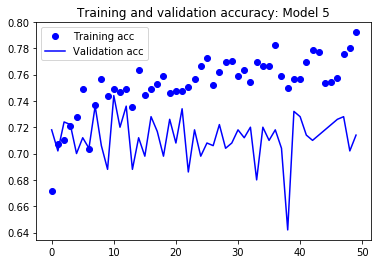

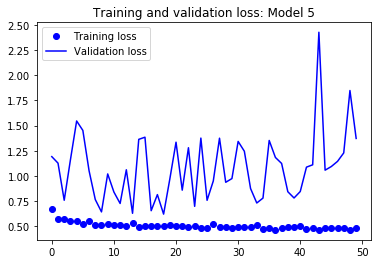

In [10]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 5')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 5')
plt.legend()

plt.show()

## Train Model 6 with batchsize=32 and lr=2e-5

In [21]:
#(65x16 = 1040 images per epoch)
history6 = model6.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list6,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
64/64 [==============================] - 213s 3s/step - loss: 0.6325 - acc: 0.6843 - val_loss: 0.7707 - val_acc: 0.7160

Epoch 00001: val_loss did not improve from 0.70876
Epoch 2/50
64/64 [==============================] - 152s 2s/step - loss: 0.5233 - acc: 0.7402 - val_loss: 1.2050 - val_acc: 0.6920

Epoch 00002: val_loss did not improve from 0.70876
Epoch 3/50
64/64 [==============================] - 146s 2s/step - loss: 0.5313 - acc: 0.7575 - val_loss: 0.8098 - val_acc: 0.7340

Epoch 00003: val_loss did not improve from 0.70876
Epoch 4/50
64/64 [==============================] - 142s 2s/step - loss: 0.5148 - acc: 0.7521 - val_loss: 0.8167 - val_acc: 0.7040

Epoch 00004: val_loss did not improve from 0.70876
Epoch 5/50
64/64 [==============================] - 158s 2s/step - loss: 0.5255 - acc: 0.7507 - val_loss: 0.7758 - val_acc: 0.7020

Epoch 00005: val_loss did not improve from 0.70876
Epoch 6/50
64/64 [==============================] - 162s 3s/step - loss: 0.5001 - acc

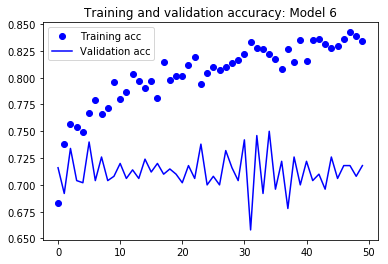

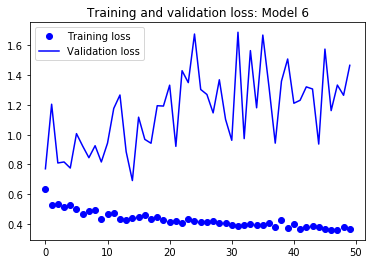

In [22]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 6')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 6')
plt.legend()

plt.show()

## Compare Accuracy

In [23]:
model1.load_weights(weight_path_model1)
model2.load_weights(weight_path_model2)
model3.load_weights(weight_path_model3)
model4.load_weights(weight_path_model4)
model5.load_weights(weight_path_model5)
model6.load_weights(weight_path_model6)

best_loss1, best_acc1 = model1.evaluate_generator(validation_generator, steps=516//batchSize)
print('Best acc of Model 1:', best_acc1)
print('Best loss of Model 1:', best_loss1)
print("-----")

best_loss2, best_acc2 = model2.evaluate_generator(validation_generator, steps=516//batchSize)
print('Best acc of Model 2:', best_acc2)
print('Best loss of Model 2:', best_loss2)
print("-----")

best_loss3, best_acc3 = model3.evaluate_generator(validation_generator, steps=516//batchSize)
print('Best acc of Model 3:', best_acc3)
print('Best loss of Model 3:', best_loss3)
print("-----")

best_loss4, best_acc4 = model4.evaluate_generator(validation_generator, steps=516//batchSize)
print('Best acc of Model 4:', best_acc4)
print('Best loss of Model 4:', best_loss4)
print("-----")

best_loss5, best_acc5 = model5.evaluate_generator(validation_generator, steps=516//batchSize)
print('Best acc of Model 5:', best_acc5)
print('Best loss of Model 5:', best_loss5)
print("-----")

best_loss6, best_acc6 = model6.evaluate_generator(validation_generator, steps=516//batchSize)
print('Best acc of Model 6:', best_acc6)
print('Best loss of Model 6:', best_loss6)

Best acc of Model 1: 0.776
Best loss of Model 1: 0.47175198382139205
-----
Best acc of Model 2: 0.742
Best loss of Model 2: 0.5127278203964234
-----
Best acc of Model 3: 0.69
Best loss of Model 3: 0.6006183543205261
-----
Best acc of Model 4: 0.712
Best loss of Model 4: 0.8114044065475464
-----
Best acc of Model 5: 0.704
Best loss of Model 5: 0.6122354726791381
-----
Best acc of Model 6: 0.72
Best loss of Model 6: 0.6938641624450683


# Try with larger batchsize = 32

In [6]:
# Create callback list for model fitting
weight_path_model1="batchsize32_weights_model1.best.hdf5"
weight_path_model2="batchsize32_weights_model2.best.hdf5"
weight_path_model3="batchsize32_weights_model3.best.hdf5"
weight_path_model4="batchsize32_weights_model4.best.hdf5"
weight_path_model5="batchsize32_weights_model5.best.hdf5"
weight_path_model6="batchsize32_weights_model6.best.hdf5"
weight_path_model7="batchsize32_weights_model7.best.hdf5"

checkpoint1 = ModelCheckpoint(weight_path_model1, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint2 = ModelCheckpoint(weight_path_model2, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint3 = ModelCheckpoint(weight_path_model3, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint4 = ModelCheckpoint(weight_path_model4, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint5 = ModelCheckpoint(weight_path_model5, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint6 = ModelCheckpoint(weight_path_model6, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
checkpoint7 = ModelCheckpoint(weight_path_model7, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

callbacks_list1 = [checkpoint1]
callbacks_list2 = [checkpoint2]
callbacks_list3 = [checkpoint3]
callbacks_list4 = [checkpoint4]
callbacks_list5 = [checkpoint5]
callbacks_list6 = [checkpoint6]
callbacks_list7 = [checkpoint7]

## Train Model 1 with batchsize=32 and lr=1e-4

In [15]:
#(65x16 = 1040 images per epoch)
history1 = model1.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list1,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
 3/32 [=>............................] - ETA: 44:38 - loss: 0.6437 - acc: 0.5625  

C:\Users\Pasin\Anaconda3\envs\py36\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.925335). Check your callbacks.
  % delta_t_median)


32/32 [==============================] - 418s 13s/step - loss: 0.5952 - acc: 0.6982 - val_loss: 0.5367 - val_acc: 0.7148

Epoch 00001: val_loss improved from inf to 0.53671, saving model to batchsize32_weights_model1.best.hdf5
Epoch 2/50
32/32 [==============================] - 145s 5s/step - loss: 0.5708 - acc: 0.7069 - val_loss: 0.5130 - val_acc: 0.7211

Epoch 00002: val_loss improved from 0.53671 to 0.51303, saving model to batchsize32_weights_model1.best.hdf5
Epoch 3/50
32/32 [==============================] - 130s 4s/step - loss: 0.5443 - acc: 0.7191 - val_loss: 0.5094 - val_acc: 0.7500

Epoch 00003: val_loss improved from 0.51303 to 0.50936, saving model to batchsize32_weights_model1.best.hdf5
Epoch 4/50
32/32 [==============================] - 123s 4s/step - loss: 0.5572 - acc: 0.7064 - val_loss: 0.5174 - val_acc: 0.7459

Epoch 00004: val_loss did not improve from 0.50936
Epoch 5/50
32/32 [==============================] - 124s 4s/step - loss: 0.5409 - acc: 0.7118 - val_loss: 0.

32/32 [==============================] - 123s 4s/step - loss: 0.4465 - acc: 0.7738 - val_loss: 0.4763 - val_acc: 0.7769

Epoch 00043: val_loss did not improve from 0.42744
Epoch 44/50
32/32 [==============================] - 123s 4s/step - loss: 0.4910 - acc: 0.7498 - val_loss: 0.5132 - val_acc: 0.7169

Epoch 00044: val_loss did not improve from 0.42744
Epoch 45/50
32/32 [==============================] - 124s 4s/step - loss: 0.5020 - acc: 0.7446 - val_loss: 0.4958 - val_acc: 0.7335

Epoch 00045: val_loss did not improve from 0.42744
Epoch 46/50
32/32 [==============================] - 125s 4s/step - loss: 0.4554 - acc: 0.7899 - val_loss: 0.4983 - val_acc: 0.7459

Epoch 00046: val_loss did not improve from 0.42744
Epoch 47/50
32/32 [==============================] - 120s 4s/step - loss: 0.4999 - acc: 0.7314 - val_loss: 0.4928 - val_acc: 0.7583

Epoch 00047: val_loss did not improve from 0.42744
Epoch 48/50
32/32 [==============================] - 123s 4s/step - loss: 0.4553 - acc: 0.77

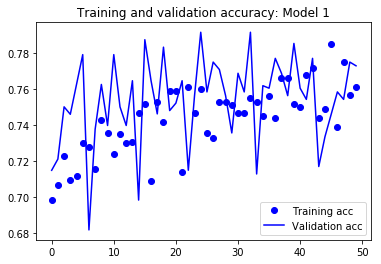

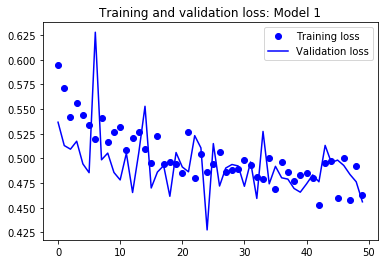

In [16]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 1')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 1')
plt.legend()

plt.show()

## Train Model 2 with batchsize=32 and lr=1e-4

In [17]:
#(65x16 = 1040 images per epoch)
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list2,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
32/32 [==============================] - 162s 5s/step - loss: 0.6523 - acc: 0.6669 - val_loss: 0.5327 - val_acc: 0.7293

Epoch 00001: val_loss improved from inf to 0.53271, saving model to batchsize32_weights_model2.best.hdf5
Epoch 2/50
32/32 [==============================] - 130s 4s/step - loss: 0.5741 - acc: 0.7264 - val_loss: 0.5395 - val_acc: 0.7376

Epoch 00002: val_loss did not improve from 0.53271
Epoch 3/50
32/32 [==============================] - 134s 4s/step - loss: 0.5388 - acc: 0.7386 - val_loss: 0.5246 - val_acc: 0.7188

Epoch 00003: val_loss improved from 0.53271 to 0.52460, saving model to batchsize32_weights_model2.best.hdf5
Epoch 4/50
32/32 [==============================] - 151s 5s/step - loss: 0.5731 - acc: 0.7122 - val_loss: 0.5349 - val_acc: 0.7190

Epoch 00004: val_loss did not improve from 0.52460
Epoch 5/50
32/32 [==============================] - 142s 4s/step - loss: 0.5253 - acc: 0.7406 - val_loss: 0.6801 - val_acc: 0.6963

Epoch 00005: val_loss di


Epoch 00043: val_loss did not improve from 0.47521
Epoch 44/50
32/32 [==============================] - 127s 4s/step - loss: 0.4813 - acc: 0.7699 - val_loss: 0.5536 - val_acc: 0.7169

Epoch 00044: val_loss did not improve from 0.47521
Epoch 45/50
32/32 [==============================] - 125s 4s/step - loss: 0.4531 - acc: 0.8045 - val_loss: 0.4902 - val_acc: 0.7583

Epoch 00045: val_loss did not improve from 0.47521
Epoch 46/50
32/32 [==============================] - 128s 4s/step - loss: 0.4694 - acc: 0.7831 - val_loss: 0.5213 - val_acc: 0.7397

Epoch 00046: val_loss did not improve from 0.47521
Epoch 47/50
32/32 [==============================] - 128s 4s/step - loss: 0.4544 - acc: 0.7777 - val_loss: 0.5093 - val_acc: 0.7562

Epoch 00047: val_loss did not improve from 0.47521
Epoch 48/50
32/32 [==============================] - 128s 4s/step - loss: 0.4633 - acc: 0.7816 - val_loss: 0.4992 - val_acc: 0.7521

Epoch 00048: val_loss did not improve from 0.47521
Epoch 49/50
32/32 [=========

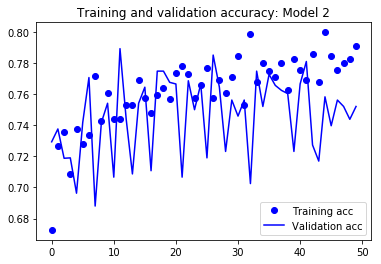

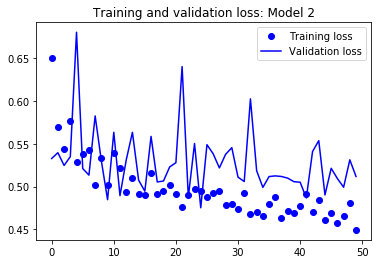

In [18]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 2')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 2')
plt.legend()

plt.show()

## Train Model 3 with batchsize=32 and lr=1e-4

In [19]:
#(65x16 = 1040 images per epoch)
history3 = model3.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list3,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
32/32 [==============================] - 183s 6s/step - loss: 0.8856 - acc: 0.7015 - val_loss: 0.6653 - val_acc: 0.7025

Epoch 00001: val_loss improved from inf to 0.66528, saving model to batchsize32_weights_model3.best.hdf5
Epoch 2/50
32/32 [==============================] - 128s 4s/step - loss: 0.6029 - acc: 0.7254 - val_loss: 0.6148 - val_acc: 0.7087

Epoch 00002: val_loss improved from 0.66528 to 0.61478, saving model to batchsize32_weights_model3.best.hdf5
Epoch 3/50
32/32 [==============================] - 159s 5s/step - loss: 0.5615 - acc: 0.7396 - val_loss: 0.6521 - val_acc: 0.7087

Epoch 00003: val_loss did not improve from 0.61478
Epoch 4/50
32/32 [==============================] - 145s 5s/step - loss: 0.5469 - acc: 0.7425 - val_loss: 0.9291 - val_acc: 0.6963

Epoch 00004: val_loss did not improve from 0.61478
Epoch 5/50
32/32 [==============================] - 150s 5s/step - loss: 0.5629 - acc: 0.7334 - val_loss: 1.0125 - val_acc: 0.7148

Epoch 00005: val_loss di

32/32 [==============================] - 132s 4s/step - loss: 0.4168 - acc: 0.8466 - val_loss: 4.2241 - val_acc: 0.6942

Epoch 00045: val_loss did not improve from 0.61478
Epoch 46/50
32/32 [==============================] - 130s 4s/step - loss: 0.4087 - acc: 0.8637 - val_loss: 3.9146 - val_acc: 0.7169

Epoch 00046: val_loss did not improve from 0.61478
Epoch 47/50
32/32 [==============================] - 130s 4s/step - loss: 0.4152 - acc: 0.8496 - val_loss: 4.1222 - val_acc: 0.6901

Epoch 00047: val_loss did not improve from 0.61478
Epoch 48/50
32/32 [==============================] - 132s 4s/step - loss: 0.3709 - acc: 0.8446 - val_loss: 3.3498 - val_acc: 0.7438

Epoch 00048: val_loss did not improve from 0.61478
Epoch 49/50
32/32 [==============================] - 132s 4s/step - loss: 0.4168 - acc: 0.8769 - val_loss: 4.3531 - val_acc: 0.6880

Epoch 00049: val_loss did not improve from 0.61478
Epoch 50/50
32/32 [==============================] - 130s 4s/step - loss: 0.4012 - acc: 0.85

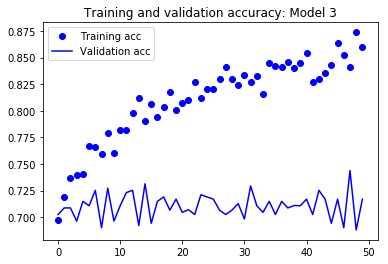

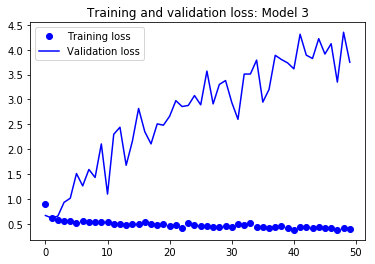

In [20]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 3')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 3')
plt.legend()

plt.show()

## Train Model 4 with batchsize=32 and lr=1e-4

In [21]:
#(65x16 = 1040 images per epoch)
history4 = model4.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list4,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
32/32 [==============================] - 184s 6s/step - loss: 0.8441 - acc: 0.6844 - val_loss: 1.0806 - val_acc: 0.7149

Epoch 00001: val_loss improved from inf to 1.08056, saving model to batchsize32_weights_model4.best.hdf5
Epoch 2/50
32/32 [==============================] - 134s 4s/step - loss: 0.5735 - acc: 0.7294 - val_loss: 1.7686 - val_acc: 0.7128

Epoch 00002: val_loss did not improve from 1.08056
Epoch 3/50
32/32 [==============================] - 158s 5s/step - loss: 0.5742 - acc: 0.7182 - val_loss: 1.1469 - val_acc: 0.7190

Epoch 00003: val_loss did not improve from 1.08056
Epoch 4/50
32/32 [==============================] - 145s 5s/step - loss: 0.5601 - acc: 0.7137 - val_loss: 1.8112 - val_acc: 0.7045

Epoch 00004: val_loss did not improve from 1.08056
Epoch 5/50
32/32 [==============================] - 155s 5s/step - loss: 0.5408 - acc: 0.7367 - val_loss: 1.1847 - val_acc: 0.7045

Epoch 00005: val_loss did not improve from 1.08056
Epoch 6/50
32/32 [=============

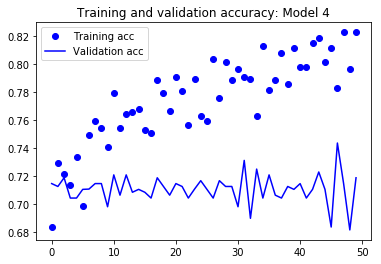

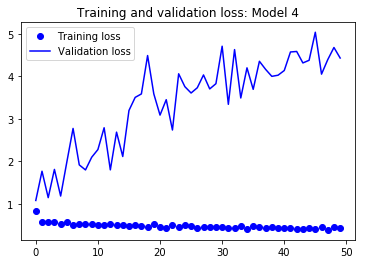

In [22]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 4')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 4')
plt.legend()

plt.show()

## Train Model 5 with batchsize=32 and lr=1e-4

In [23]:
#(65x16 = 1040 images per epoch)
history5 = model5.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list5,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
32/32 [==============================] - 180s 6s/step - loss: 0.6791 - acc: 0.7064 - val_loss: 0.9015 - val_acc: 0.7252

Epoch 00001: val_loss improved from inf to 0.90145, saving model to batchsize32_weights_model5.best.hdf5
Epoch 2/50
32/32 [==============================] - 140s 4s/step - loss: 0.5688 - acc: 0.7191 - val_loss: 0.8439 - val_acc: 0.5868

Epoch 00002: val_loss improved from 0.90145 to 0.84393, saving model to batchsize32_weights_model5.best.hdf5
Epoch 3/50
32/32 [==============================] - 158s 5s/step - loss: 0.5813 - acc: 0.7172 - val_loss: 1.3547 - val_acc: 0.6983

Epoch 00003: val_loss did not improve from 0.84393
Epoch 4/50
32/32 [==============================] - 154s 5s/step - loss: 0.5181 - acc: 0.7396 - val_loss: 0.8717 - val_acc: 0.7128

Epoch 00004: val_loss did not improve from 0.84393
Epoch 5/50
32/32 [==============================] - 151s 5s/step - loss: 0.5553 - acc: 0.7362 - val_loss: 1.6927 - val_acc: 0.7149

Epoch 00005: val_loss di


Epoch 00043: val_loss did not improve from 0.65769
Epoch 44/50
32/32 [==============================] - 141s 4s/step - loss: 0.4381 - acc: 0.7851 - val_loss: 1.9013 - val_acc: 0.7149

Epoch 00044: val_loss did not improve from 0.65769
Epoch 45/50
32/32 [==============================] - 140s 4s/step - loss: 0.4544 - acc: 0.8056 - val_loss: 1.8919 - val_acc: 0.7273

Epoch 00045: val_loss did not improve from 0.65769
Epoch 46/50
32/32 [==============================] - 140s 4s/step - loss: 0.4627 - acc: 0.7836 - val_loss: 1.1365 - val_acc: 0.5269

Epoch 00046: val_loss did not improve from 0.65769
Epoch 47/50
32/32 [==============================] - 140s 4s/step - loss: 0.4390 - acc: 0.8006 - val_loss: 1.9619 - val_acc: 0.7169

Epoch 00047: val_loss did not improve from 0.65769
Epoch 48/50
32/32 [==============================] - 141s 4s/step - loss: 0.4362 - acc: 0.7963 - val_loss: 2.4308 - val_acc: 0.7231

Epoch 00048: val_loss did not improve from 0.65769
Epoch 49/50
32/32 [=========

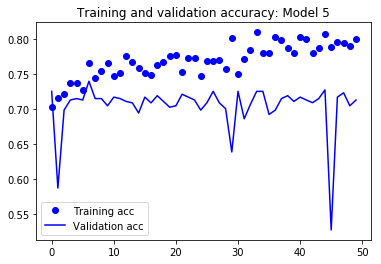

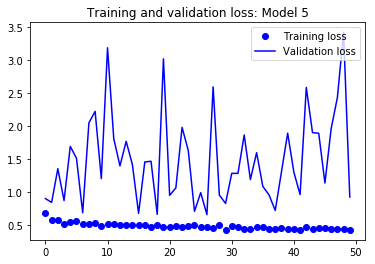

In [24]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 5')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 5')
plt.legend()

plt.show()

## Train Model 6 with batchsize=32 and lr=1e-4

In [25]:
#(65x16 = 1040 images per epoch)
history6 = model6.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list6,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
32/32 [==============================] - 608s 19s/step - loss: 3.3016 - acc: 0.6898 - val_loss: 0.9626 - val_acc: 0.7190

Epoch 00001: val_loss improved from inf to 0.96262, saving model to batchsize32_weights_model6.best.hdf5
Epoch 2/50
32/32 [==============================] - 187s 6s/step - loss: 0.5395 - acc: 0.7558 - val_loss: 1.0040 - val_acc: 0.7190

Epoch 00002: val_loss did not improve from 0.96262
Epoch 3/50
32/32 [==============================] - 200s 6s/step - loss: 0.5006 - acc: 0.7636 - val_loss: 0.9798 - val_acc: 0.7045

Epoch 00003: val_loss did not improve from 0.96262
Epoch 4/50
32/32 [==============================] - 178s 6s/step - loss: 0.5164 - acc: 0.7504 - val_loss: 1.0937 - val_acc: 0.7045

Epoch 00004: val_loss did not improve from 0.96262
Epoch 5/50
32/32 [==============================] - 172s 5s/step - loss: 0.4639 - acc: 0.7943 - val_loss: 0.5174 - val_acc: 0.7438

Epoch 00005: val_loss improved from 0.96262 to 0.51737, saving model to batchsize

32/32 [==============================] - 153s 5s/step - loss: 0.2482 - acc: 0.9003 - val_loss: 1.8901 - val_acc: 0.7109

Epoch 00045: val_loss did not improve from 0.51737
Epoch 46/50
32/32 [==============================] - 150s 5s/step - loss: 0.2112 - acc: 0.9130 - val_loss: 2.3525 - val_acc: 0.7128

Epoch 00046: val_loss did not improve from 0.51737
Epoch 47/50
32/32 [==============================] - 150s 5s/step - loss: 0.2305 - acc: 0.8993 - val_loss: 1.9411 - val_acc: 0.7107

Epoch 00047: val_loss did not improve from 0.51737
Epoch 48/50
32/32 [==============================] - 153s 5s/step - loss: 0.2315 - acc: 0.9032 - val_loss: 2.5740 - val_acc: 0.7231

Epoch 00048: val_loss did not improve from 0.51737
Epoch 49/50
32/32 [==============================] - 150s 5s/step - loss: 0.2317 - acc: 0.9102 - val_loss: 2.8352 - val_acc: 0.6818

Epoch 00049: val_loss did not improve from 0.51737
Epoch 50/50
32/32 [==============================] - 158s 5s/step - loss: 0.2486 - acc: 0.89

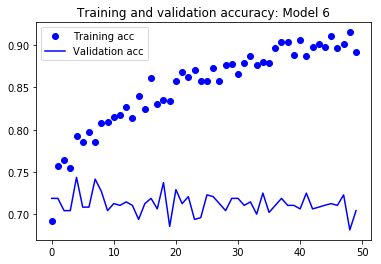

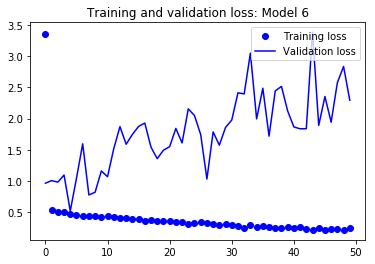

In [26]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 6')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 6')
plt.legend()

plt.show()

## Train Model 7 with batchsize=32 and lr=1e-4

In [29]:
#(65x16 = 1040 images per epoch)
history7 = model7.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 50,
    callbacks = callbacks_list7,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/50
32/32 [==============================] - 493s 15s/step - loss: 0.5953 - acc: 0.7011 - val_loss: 0.5503 - val_acc: 0.7025

Epoch 00001: val_loss improved from inf to 0.55026, saving model to batchsize32_weights_model7.best.hdf5
Epoch 2/50
32/32 [==============================] - 162s 5s/step - loss: 0.5740 - acc: 0.7050 - val_loss: 0.5453 - val_acc: 0.7128

Epoch 00002: val_loss improved from 0.55026 to 0.54535, saving model to batchsize32_weights_model7.best.hdf5
Epoch 3/50
32/32 [==============================] - 257s 8s/step - loss: 0.5543 - acc: 0.7142 - val_loss: 0.5173 - val_acc: 0.7207

Epoch 00003: val_loss improved from 0.54535 to 0.51729, saving model to batchsize32_weights_model7.best.hdf5
Epoch 4/50
32/32 [==============================] - 206s 6s/step - loss: 0.5385 - acc: 0.7064 - val_loss: 0.5175 - val_acc: 0.7293

Epoch 00004: val_loss did not improve from 0.51729
Epoch 5/50
32/32 [==============================] - 147s 5s/step - loss: 0.5356 - acc: 0.7185 - v

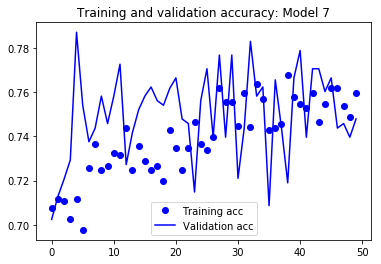

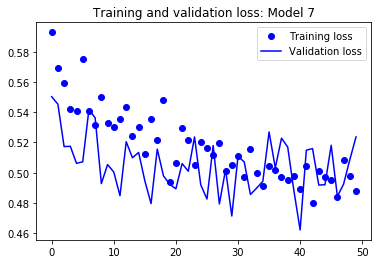

In [30]:
acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 7')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 7')
plt.legend()

plt.show()

## Go further with Model 1

In [7]:
model1.load_weights(weight_path_model1)

#(65x16 = 1040 images per epoch)
history1 = model1.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 150,
    callbacks = callbacks_list1,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/150
32/32 [==============================] - 268s 8s/step - loss: 0.4889 - acc: 0.7471 - val_loss: 0.4839 - val_acc: 0.7578

Epoch 00001: val_loss improved from inf to 0.48390, saving model to batchsize32_weights_model1.best.hdf5
Epoch 2/150
32/32 [==============================] - 113s 4s/step - loss: 0.5089 - acc: 0.7489 - val_loss: 0.4858 - val_acc: 0.7686

Epoch 00002: val_loss did not improve from 0.48390
Epoch 3/150
32/32 [==============================] - 125s 4s/step - loss: 0.4903 - acc: 0.7475 - val_loss: 0.4564 - val_acc: 0.7934

Epoch 00003: val_loss improved from 0.48390 to 0.45637, saving model to batchsize32_weights_model1.best.hdf5
Epoch 4/150
32/32 [==============================] - 130s 4s/step - loss: 0.4876 - acc: 0.7523 - val_loss: 0.4886 - val_acc: 0.7624

Epoch 00004: val_loss did not improve from 0.45637
Epoch 5/150
32/32 [==============================] - 123s 4s/step - loss: 0.5083 - acc: 0.7528 - val_loss: 0.4764 - val_acc: 0.7603

Epoch 00005: val_lo

32/32 [==============================] - 120s 4s/step - loss: 0.4373 - acc: 0.7797 - val_loss: 0.5167 - val_acc: 0.7562

Epoch 00087: val_loss did not improve from 0.42075
Epoch 88/150
32/32 [==============================] - 120s 4s/step - loss: 0.4406 - acc: 0.7816 - val_loss: 0.4733 - val_acc: 0.7831

Epoch 00088: val_loss did not improve from 0.42075
Epoch 89/150
32/32 [==============================] - 120s 4s/step - loss: 0.4236 - acc: 0.8012 - val_loss: 0.5097 - val_acc: 0.7707

Epoch 00089: val_loss did not improve from 0.42075
Epoch 90/150
32/32 [==============================] - 120s 4s/step - loss: 0.4485 - acc: 0.7938 - val_loss: 0.4703 - val_acc: 0.7831

Epoch 00090: val_loss did not improve from 0.42075
Epoch 91/150
32/32 [==============================] - 120s 4s/step - loss: 0.4337 - acc: 0.7889 - val_loss: 0.4867 - val_acc: 0.7645

Epoch 00091: val_loss did not improve from 0.42075
Epoch 92/150
32/32 [==============================] - 121s 4s/step - loss: 0.4597 - acc:

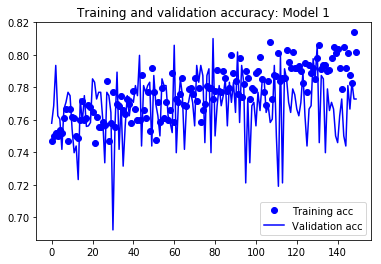

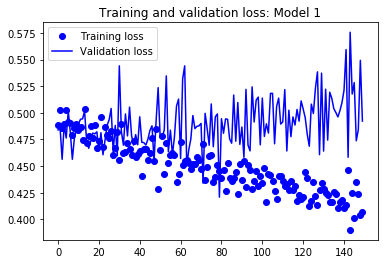

In [8]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 1')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 1')
plt.legend()

plt.show()

## Go further with Model 2

In [9]:
model2.load_weights(weight_path_model2)
#(65x16 = 1040 images per epoch)
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch = 1031//batchSize,
    verbose = 1,
    epochs = 150,
    callbacks = callbacks_list2,
    validation_data = validation_generator,
    validation_steps = 516//batchSize)

Epoch 1/150
32/32 [==============================] - 135s 4s/step - loss: 0.5259 - acc: 0.7518 - val_loss: 0.4789 - val_acc: 0.7748

Epoch 00001: val_loss improved from inf to 0.47889, saving model to batchsize32_weights_model2.best.hdf5
Epoch 2/150
32/32 [==============================] - 120s 4s/step - loss: 0.4846 - acc: 0.7436 - val_loss: 0.5176 - val_acc: 0.7397

Epoch 00002: val_loss did not improve from 0.47889
Epoch 3/150
32/32 [==============================] - 120s 4s/step - loss: 0.4997 - acc: 0.7601 - val_loss: 0.5116 - val_acc: 0.7686

Epoch 00003: val_loss did not improve from 0.47889
Epoch 4/150
32/32 [==============================] - 120s 4s/step - loss: 0.4667 - acc: 0.7904 - val_loss: 0.5538 - val_acc: 0.7273

Epoch 00004: val_loss did not improve from 0.47889
Epoch 5/150
32/32 [==============================] - 124s 4s/step - loss: 0.4917 - acc: 0.7664 - val_loss: 0.5735 - val_acc: 0.7148

Epoch 00005: val_loss did not improve from 0.47889
Epoch 6/150
32/32 [=======

32/32 [==============================] - 122s 4s/step - loss: 0.4242 - acc: 0.8109 - val_loss: 0.4855 - val_acc: 0.7541

Epoch 00045: val_loss did not improve from 0.47336
Epoch 46/150
32/32 [==============================] - 118s 4s/step - loss: 0.4703 - acc: 0.7777 - val_loss: 0.5592 - val_acc: 0.7169

Epoch 00046: val_loss did not improve from 0.47336
Epoch 47/150
32/32 [==============================] - 120s 4s/step - loss: 0.4503 - acc: 0.7889 - val_loss: 0.4880 - val_acc: 0.7624

Epoch 00047: val_loss did not improve from 0.47336
Epoch 48/150
32/32 [==============================] - 121s 4s/step - loss: 0.4669 - acc: 0.7724 - val_loss: 0.5440 - val_acc: 0.7211

Epoch 00048: val_loss did not improve from 0.47336
Epoch 49/150
32/32 [==============================] - 120s 4s/step - loss: 0.4510 - acc: 0.7948 - val_loss: 0.5072 - val_acc: 0.7459

Epoch 00049: val_loss did not improve from 0.47336
Epoch 50/150
32/32 [==============================] - 119s 4s/step - loss: 0.4683 - acc:

32/32 [==============================] - 119s 4s/step - loss: 0.4418 - acc: 0.7909 - val_loss: 0.5087 - val_acc: 0.7624

Epoch 00089: val_loss did not improve from 0.47165
Epoch 90/150
32/32 [==============================] - 125s 4s/step - loss: 0.4349 - acc: 0.7880 - val_loss: 0.5104 - val_acc: 0.7598

Epoch 00090: val_loss did not improve from 0.47165
Epoch 91/150
32/32 [==============================] - 117s 4s/step - loss: 0.4578 - acc: 0.7773 - val_loss: 0.5183 - val_acc: 0.7438

Epoch 00091: val_loss did not improve from 0.47165
Epoch 92/150
32/32 [==============================] - 121s 4s/step - loss: 0.4193 - acc: 0.8051 - val_loss: 0.5139 - val_acc: 0.7500

Epoch 00092: val_loss did not improve from 0.47165
Epoch 93/150
32/32 [==============================] - 120s 4s/step - loss: 0.4336 - acc: 0.7968 - val_loss: 0.5093 - val_acc: 0.7376

Epoch 00093: val_loss did not improve from 0.47165
Epoch 94/150
32/32 [==============================] - 119s 4s/step - loss: 0.4429 - acc:

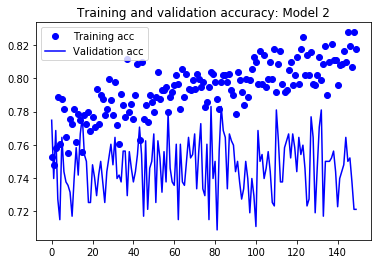

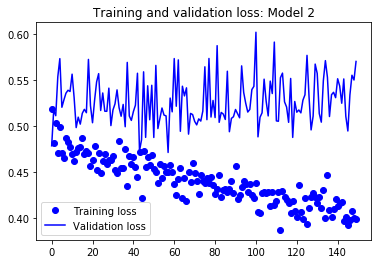

In [10]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: Model 2')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: Model 2')
plt.legend()

plt.show()